# Medhavi Singh

### Student No: 8963517

### INFO8066 – DATA ANALYTICS

### Date : 17/11/2024

# Task 1: Data Cleaning

In [68]:
#importing neccessasary library pandas as we have to use some functions which are associated with it
import pandas as pd

#loading our uncleaned data as a dataframe with pandas
data = pd.read_csv(r"C:\Users\medha\OneDrive\Desktop\Bussiness_Analytics\Data Analysis\Assignment_2\UnCleaned_Conestoga_Dataset.csv")
data.head()

,Student ID,Name,LongName,Age,Height,Weight,CarTheyOwn,Born,JoinedCollege,HomeTown,FavouriteMovie,duration,listed_in,credit_amount,personal_status,job,Favorite App
0,141154,Zulqarnain Haider,Zulqarnain Haider,33,"5'7""",159lbs,Ford Kuga,1993.0,01-Jul-04,"New York, NY",Dick Johnson Is Dead,90 min,Documentaries,1169,male single,skilled,Insta
1,141335,Zulqarnain,Zulqarnain,21,"6'2""",183lbs,Hyundai i10,1968.0,10-Jul-18,"Chantilly, VA",Ganglands,1 Season,"Crime TV Shows, International TV Shows, TV Act...",5951,female div/dep/mar,skilled,TikTok
2,141890,Zubair Watto,Zubair Watto,29,"6'2""",192lbs,Audi Q4 e-tron,1981.0,16-Jul-14,"Boston, MA",Midnight Mass,1 Season,"TV Dramas, TV Horror, TV Mysteries",2096,male single,unskilled resident,Insta
3,141984,Zubair Malik,Zubair Malik,37,"5'11""",154lbs,Honda CR-V,2000.0,30-Aug-15,"Newton, MA",Confessions of an Invisible Girl,91 min,"Children & Family Movies, Comedies",6819,male single,skilled,Facebook
4,142069,Zohaib Shera,Zohaib Shera,21,"5'9""",150lbs,Kia Sportage,1998.0,03-Aug-17,"New York, NY",Sankofa,125 min,"Dramas, Independent Movies, International Movies",4870,male single,skilled,TikTok


In [69]:
#Here getting some information about the data whether it has any null values and the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Student ID       1017 non-null   int64  
 1   Name             1017 non-null   object 
 2   LongName         1017 non-null   object 
 3   Age              1017 non-null   int64  
 4   Height           1017 non-null   object 
 5   Weight           1017 non-null   object 
 6   CarTheyOwn       1017 non-null   object 
 7   Born             987 non-null    float64
 8   JoinedCollege    1017 non-null   object 
 9   HomeTown         684 non-null    object 
 10  FavouriteMovie   1017 non-null   object 
 11  duration         1017 non-null   object 
 12  listed_in        1017 non-null   object 
 13  credit_amount    1017 non-null   int64  
 14  personal_status  1011 non-null   object 
 15  job              1009 non-null   object 
 16  Favorite App     662 non-null    object 
dtypes: float64(1),

In [70]:
#To get the number of rows and columns that our data has
data.shape

(1017, 17)

In [71]:
#Here checking how many null values each column contains
data.isnull().sum()

Student ID           0
Name                 0
LongName             0
Age                  0
Height               0
Weight               0
CarTheyOwn           0
Born                30
JoinedCollege        0
HomeTown           333
FavouriteMovie       0
duration             0
listed_in            0
credit_amount        0
personal_status      6
job                  8
Favorite App       355
dtype: int64

In [72]:
#Filling the NA values in "Born" column with the most repeated value in it and changing the data type to object from float
data['Born'] = data['Born'].fillna(data['Born'].mode()[0]).astype(int).astype(str)

In [73]:
#Dropping the column "HomeTown as it has a lot of null values already"
data.drop(columns=['HomeTown'], inplace=True)

In [74]:
#dropping another column "Favorite App" as this column also has a lot of null values in it and these are string type too
data.drop(columns=['Favorite App'], inplace=True)

In [75]:
#In the job column only a few values are missing, filling those values with "unknown"
data['job'].fillna('Unknown', inplace=True)

In [76]:
#Again checking our data for the null values
#NO NULL VALUE IS FOUND IN THE DATA NOW
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       1017 non-null   int64 
 1   Name             1017 non-null   object
 2   LongName         1017 non-null   object
 3   Age              1017 non-null   int64 
 4   Height           1017 non-null   object
 5   Weight           1017 non-null   object
 6   CarTheyOwn       1017 non-null   object
 7   Born             1017 non-null   object
 8   JoinedCollege    1017 non-null   object
 9   FavouriteMovie   1017 non-null   object
 10  duration         1017 non-null   object
 11  listed_in        1017 non-null   object
 12  credit_amount    1017 non-null   int64 
 13  personal_status  1011 non-null   object
 14  job              1017 non-null   object
dtypes: int64(3), object(12)
memory usage: 119.3+ KB


In [77]:
#Converting "Height" column from feet and inches to cm.
#Applying a function height_to_cm for the same purpose
def height_to_cm(height_str):
    feet, inches = map(int, height_str.replace('"', '').split("'"))
    return round((feet * 30.48) + (inches * 2.54), 2)

data['Height(cm)'] = data['Height'].apply(height_to_cm)

#Dropping original colummn height
data.drop(columns=["Height"], inplace=True)

In [78]:
# Spliting column 'CarTheyOwn' into two new columns: 'Car Company' and 'Car Model'
data[['Car Company', 'Car Model']] = data['CarTheyOwn'].str.split(' ', 1, expand=True)

C:\Users\medha\AppData\Local\Temp\ipykernel_11380\3395024781.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['Car Company', 'Car Model']] = data['CarTheyOwn'].str.split(' ', 1, expand=True)


In [79]:
#Dropping column "CarTheyOwn" as it has already been spitted into two new columns and now is of no use
data.drop(columns=['CarTheyOwn'], inplace=True)

In [80]:
data.head()

,Student ID,Name,LongName,Age,Weight,Born,JoinedCollege,FavouriteMovie,duration,listed_in,credit_amount,personal_status,job,Height(cm),Car Company,Car Model
0,141154,Zulqarnain Haider,Zulqarnain Haider,33,159lbs,1993,01-Jul-04,Dick Johnson Is Dead,90 min,Documentaries,1169,male single,skilled,170.18,Ford,Kuga
1,141335,Zulqarnain,Zulqarnain,21,183lbs,1968,10-Jul-18,Ganglands,1 Season,"Crime TV Shows, International TV Shows, TV Act...",5951,female div/dep/mar,skilled,187.96,Hyundai,i10
2,141890,Zubair Watto,Zubair Watto,29,192lbs,1981,16-Jul-14,Midnight Mass,1 Season,"TV Dramas, TV Horror, TV Mysteries",2096,male single,unskilled resident,187.96,Audi,Q4 e-tron
3,141984,Zubair Malik,Zubair Malik,37,154lbs,2000,30-Aug-15,Confessions of an Invisible Girl,91 min,"Children & Family Movies, Comedies",6819,male single,skilled,180.34,Honda,CR-V
4,142069,Zohaib Shera,Zohaib Shera,21,150lbs,1998,03-Aug-17,Sankofa,125 min,"Dramas, Independent Movies, International Movies",4870,male single,skilled,175.26,Kia,Sportage


In [81]:
# Convert 'CollegeJoined' from object to datetime format
data['JoinedCollege'] = pd.to_datetime(data['JoinedCollege'], errors='coerce')

# Extract Day, Month, and Year from 'CollegeJoined'
data['Day Joined'] = data['JoinedCollege'].dt.day
data['Month Joined'] = data['JoinedCollege'].dt.month
data['Year Joined'] = data['JoinedCollege'].dt.year

data.drop(columns=["JoinedCollege"], inplace = True)

In [82]:
data.head()

,Student ID,Name,LongName,Age,Weight,Born,FavouriteMovie,duration,listed_in,credit_amount,personal_status,job,Height(cm),Car Company,Car Model,Day Joined,Month Joined,Year Joined
0,141154,Zulqarnain Haider,Zulqarnain Haider,33,159lbs,1993,Dick Johnson Is Dead,90 min,Documentaries,1169,male single,skilled,170.18,Ford,Kuga,1,7,2004
1,141335,Zulqarnain,Zulqarnain,21,183lbs,1968,Ganglands,1 Season,"Crime TV Shows, International TV Shows, TV Act...",5951,female div/dep/mar,skilled,187.96,Hyundai,i10,10,7,2018
2,141890,Zubair Watto,Zubair Watto,29,192lbs,1981,Midnight Mass,1 Season,"TV Dramas, TV Horror, TV Mysteries",2096,male single,unskilled resident,187.96,Audi,Q4 e-tron,16,7,2014
3,141984,Zubair Malik,Zubair Malik,37,154lbs,2000,Confessions of an Invisible Girl,91 min,"Children & Family Movies, Comedies",6819,male single,skilled,180.34,Honda,CR-V,30,8,2015
4,142069,Zohaib Shera,Zohaib Shera,21,150lbs,1998,Sankofa,125 min,"Dramas, Independent Movies, International Movies",4870,male single,skilled,175.26,Kia,Sportage,3,8,2017


In [83]:
#Filling the few nan values with unknown
data['personal_status'].fillna('Unknown Unknown', inplace=True)


# Split 'personal_status' into two new columns: 'Gender' and 'Marital Status'
data[['Gender', 'Marital Status']] = data['personal_status'].str.split(' ', 1, expand=True)

#Dropping column personal_status

data.drop(columns=["personal_status"], inplace=True)

C:\Users\medha\AppData\Local\Temp\ipykernel_11380\2086972230.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['Gender', 'Marital Status']] = data['personal_status'].str.split(' ', 1, expand=True)


In [84]:
# Rename specific columns
data = data.rename(columns={
    'duration': 'Movie Duration',
    'listed_in': 'Genere',
    'job': 'Skill Level',
    'Weight': 'Weight(lbs)',
    'credit_amount': 'Credit Amount'
})

data.head()


,Student ID,Name,LongName,Age,Weight(lbs),Born,FavouriteMovie,Movie Duration,Genere,Credit Amount,Skill Level,Height(cm),Car Company,Car Model,Day Joined,Month Joined,Year Joined,Gender,Marital Status
0,141154,Zulqarnain Haider,Zulqarnain Haider,33,159lbs,1993,Dick Johnson Is Dead,90 min,Documentaries,1169,skilled,170.18,Ford,Kuga,1,7,2004,male,single
1,141335,Zulqarnain,Zulqarnain,21,183lbs,1968,Ganglands,1 Season,"Crime TV Shows, International TV Shows, TV Act...",5951,skilled,187.96,Hyundai,i10,10,7,2018,female,div/dep/mar
2,141890,Zubair Watto,Zubair Watto,29,192lbs,1981,Midnight Mass,1 Season,"TV Dramas, TV Horror, TV Mysteries",2096,unskilled resident,187.96,Audi,Q4 e-tron,16,7,2014,male,single
3,141984,Zubair Malik,Zubair Malik,37,154lbs,2000,Confessions of an Invisible Girl,91 min,"Children & Family Movies, Comedies",6819,skilled,180.34,Honda,CR-V,30,8,2015,male,single
4,142069,Zohaib Shera,Zohaib Shera,21,150lbs,1998,Sankofa,125 min,"Dramas, Independent Movies, International Movies",4870,skilled,175.26,Kia,Sportage,3,8,2017,male,single


In [85]:
# Replacing values in 'Skill Level' column with numeric values
data['Skill Level'] = data['Skill Level'].replace({
    'skilled': 1,
    'unskilled resident': 0,
    'unemp/unskilled non res': 0,
    'high qualif/ self emp/ mgmt': 2
})

data.head()

,Student ID,Name,LongName,Age,Weight(lbs),Born,FavouriteMovie,Movie Duration,Genere,Credit Amount,Skill Level,Height(cm),Car Company,Car Model,Day Joined,Month Joined,Year Joined,Gender,Marital Status
0,141154,Zulqarnain Haider,Zulqarnain Haider,33,159lbs,1993,Dick Johnson Is Dead,90 min,Documentaries,1169,1,170.18,Ford,Kuga,1,7,2004,male,single
1,141335,Zulqarnain,Zulqarnain,21,183lbs,1968,Ganglands,1 Season,"Crime TV Shows, International TV Shows, TV Act...",5951,1,187.96,Hyundai,i10,10,7,2018,female,div/dep/mar
2,141890,Zubair Watto,Zubair Watto,29,192lbs,1981,Midnight Mass,1 Season,"TV Dramas, TV Horror, TV Mysteries",2096,0,187.96,Audi,Q4 e-tron,16,7,2014,male,single
3,141984,Zubair Malik,Zubair Malik,37,154lbs,2000,Confessions of an Invisible Girl,91 min,"Children & Family Movies, Comedies",6819,1,180.34,Honda,CR-V,30,8,2015,male,single
4,142069,Zohaib Shera,Zohaib Shera,21,150lbs,1998,Sankofa,125 min,"Dramas, Independent Movies, International Movies",4870,1,175.26,Kia,Sportage,3,8,2017,male,single


In [86]:
# Removing non-numeric character which is lbs from the 'Weight(lbs)' column
data['Weight(lbs)'] = data['Weight(lbs)'].replace(r'[^\d.]', '', regex=True)

# Converting the 'Weight(lbs)' column to float first and then to int
data['Weight(lbs)'] = data['Weight(lbs)'].astype('int64')

#Changing the datatype for other columns also

data['Day Joined'] = data['Day Joined'].astype(object)
data['Month Joined'] = data['Month Joined'].astype(object)
data['Year Joined'] = data['Year Joined'].astype(object)
data['Student ID'] = data['Student ID'].astype(object)
data['Credit Amount'] = data['Credit Amount'].astype(float)
data['Height(cm)'] = data['Height(cm)'].astype(object)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student ID      1017 non-null   object 
 1   Name            1017 non-null   object 
 2   LongName        1017 non-null   object 
 3   Age             1017 non-null   int64  
 4   Weight(lbs)     1017 non-null   int64  
 5   Born            1017 non-null   object 
 6   FavouriteMovie  1017 non-null   object 
 7   Movie Duration  1017 non-null   object 
 8   Genere          1017 non-null   object 
 9   Credit Amount   1017 non-null   float64
 10  Skill Level     1017 non-null   object 
 11  Height(cm)      1017 non-null   object 
 12  Car Company     1017 non-null   object 
 13  Car Model       1008 non-null   object 
 14  Day Joined      1017 non-null   object 
 15  Month Joined    1017 non-null   object 
 16  Year Joined     1017 non-null   object 
 17  Gender          1017 non-null   o

# Task 2: Data Exploration

In [88]:
# 1.Summary statistics for numeric columns
print(data.describe())

               Age  Weight(lbs)  Credit Amount
count  1017.000000  1017.000000    1017.000000
mean     31.422812   169.359882    3555.789577
std       6.648677    16.387600    2718.114456
min      17.000000   128.000000      37.000000
25%      27.000000   157.000000    1473.000000
50%      32.000000   170.000000    2764.000000
75%      35.000000   181.000000    5010.000000
max      55.000000   220.000000   18424.000000


The average age of individuals is around 31 years, with a range from 17 to 55 years. 
Weights range from 128 lbs to 220 lbs, with an average of 169 lbs.
The credit amount ranges from 37 to 18,424, with an average of 3,556.
The data shows typical distributions with a middle 50% of individuals having ages between 27 and 35 years,
weights between 157 and 181 lbs, and credit amounts between 1,473 and 5,010.
The standard deviations suggest moderate variability in all three variables.

In [89]:
# 2.Number of male and female in the data from column Gender
print(data['Gender'].value_counts())

male       700
female     311
Unknown      6
Name: Gender, dtype: int64


The number of male student is more than the female students

In [90]:
# 3.calculating mean for 'Credit Amount' by grouping data by 'Gender'
gender_credit = data.groupby('Gender')['Credit Amount'].mean()
print(gender_credit)

Gender
Unknown    5966.833333
female     3324.681672
male       3637.801429
Name: Credit Amount, dtype: float64


Here, credit amount is also more of the male students than the female ones.

In [91]:
# 4.Average credit amount by 'Car Company' type in descending order
data.groupby('Car Company')['Credit Amount'].mean().sort_values(ascending=False)

Car Company
Alfa           5064.705882
Bentley        4365.750000
Honda          4226.875000
Dodge          4106.200000
Chevrolet      4093.500000
Jeep           3970.600000
Dacia          3945.818182
Ford           3756.173184
Lamborghini    3731.333333
Mazda          3672.500000
Kia            3610.057692
Citroen        3573.794118
Audi           3500.035088
Ferrari        3412.000000
Fiat           3403.666667
Jaguar         3325.562500
BMW            3295.477064
Hyundai        3251.782609
Land           3161.933333
Isuzu          2699.750000
Maserati       2691.250000
Aston          2497.500000
Daihatsu       1804.000000
Name: Credit Amount, dtype: float64

The owners of the car from the Alfa company have highest average credit amount than the other car owners.

In [92]:
# 5.Calculating range for 'Age' column

age_range = data['Age'].max() - data['Age'].min()

print(f"Range of Age: {age_range}")

Range of Age: 38


The total age gap the the youngest to the oldest is of 38 years.

# Task 3: Data Visualisation

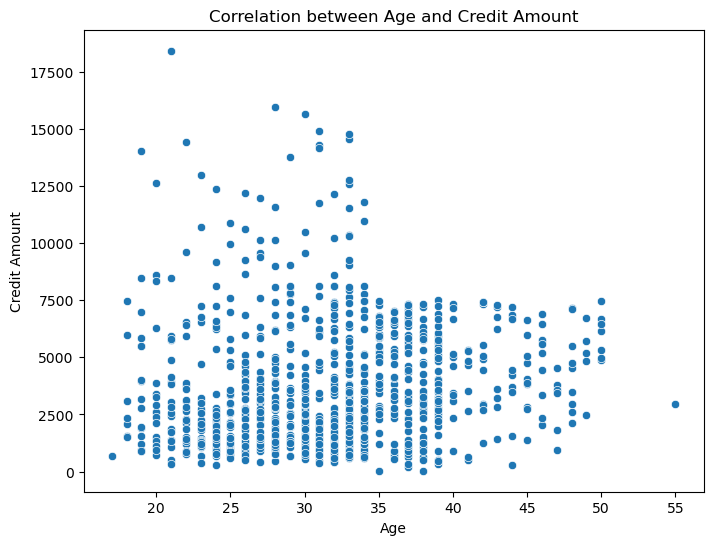

Correlation coefficient between Age and Credit Amount: 0.10856961609925535


In [93]:
#Q1: Does age correlate with credit amount, and if so, how?
#For this we can create scatter plot

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize correlation between Age and Credit Amount
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Age', y='Credit Amount')
plt.title('Correlation between Age and Credit Amount')
plt.xlabel('Age')
plt.ylabel('Credit Amount')
plt.show()

# Computing the correlation coefficient
correlation = data['Age'].corr(data['Credit Amount'])
print(f"Correlation coefficient between Age and Credit Amount: {correlation}")

Since the correlation is positive, it suggests that as Age increases, 
Credit Amount tends to increase slightly, but the relationship is weak, as it is almost 0, 
meaning age does not strongly influence credit amounts in this dataset. Also, the scatter plot is randomly scattered so, it suggests that there is no correlation between these two.

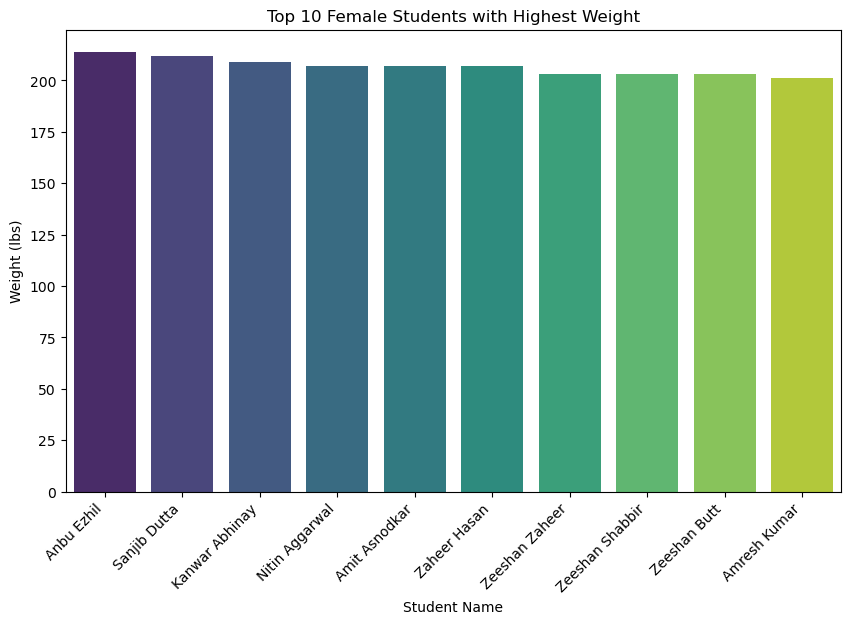

In [94]:
#Q2: Identify the top 10 female students with the highest weights(lbs).

# Filter dataset for females only and sort by weight (descending)
top_females_weight = data[data['Gender'] == 'female'].sort_values('Weight(lbs)', ascending=False).head(10)

# Bar plot for top 10 female students with the highest weight
plt.figure(figsize=(10,6))
sns.barplot(data=top_females_weight, x='Name', y='Weight(lbs)', palette='viridis')
plt.title('Top 10 Female Students with Highest Weight')
plt.xlabel('Student Name')
plt.ylabel('Weight (lbs)')
plt.xticks(rotation=45, ha='right')
plt.show()

Here are the top 10 female students with highest weight
Top of the list is Anbu Ezhil who is above 200lbs

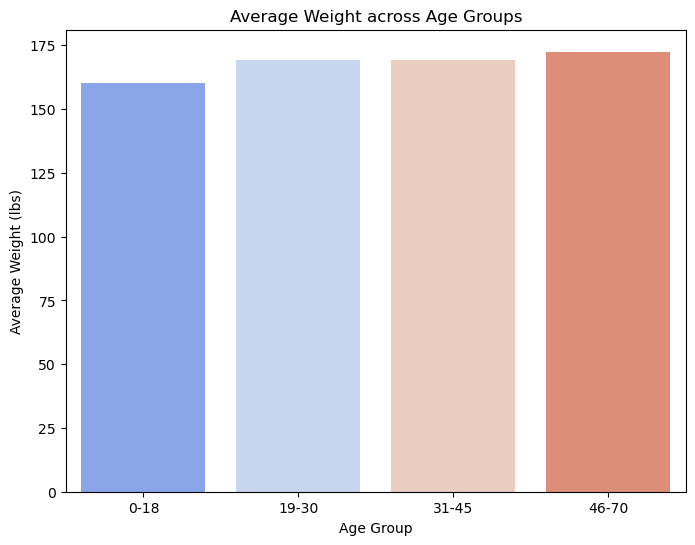

In [95]:
#Q3: What is the average weight across different age groups?

# Create age bins (e.g., 18-25, 26-35, etc.)
age_bins = [0, 18, 30, 45, 70]
age_labels = ['0-18','19-30', '31-45', '46-70']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Plot average weight by age group
avg_weight_by_age = data.groupby('Age Group')['Weight(lbs)'].mean()

# Bar plot for average weight across age groups
plt.figure(figsize=(8,6))
sns.barplot(x=avg_weight_by_age.index, y=avg_weight_by_age.values, palette='coolwarm')
plt.title('Average Weight across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Weight (lbs)')
plt.show()

The age group with the highest weight is 46-70 in the dataset.

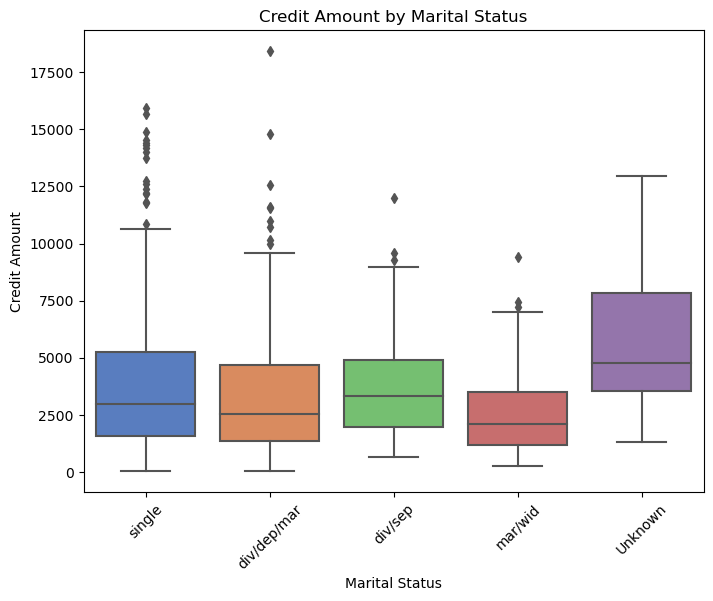

In [96]:
#Q4: How does the marital status relate to credit amount?

# Box plot to compare credit amount by marital status
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='Marital Status', y='Credit Amount', palette='muted')
plt.title('Credit Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Credit Amount')
plt.xticks(rotation=45)
plt.show()

The boxplot shows that individuals with a single marital status tend to have higher credit amounts
with several outliers reaching over 15,000. People who are divorced/separated or widowed have relatively 
lower credit amounts, and their distributions are more concentrated within the lower ranges. 
The divorced/separated group shows some higher credit amounts, while married individuals have a slightly higher
median credit amount than the other groups. 
There are some outliers in all categories, especially in the single and divorced/separated groups.

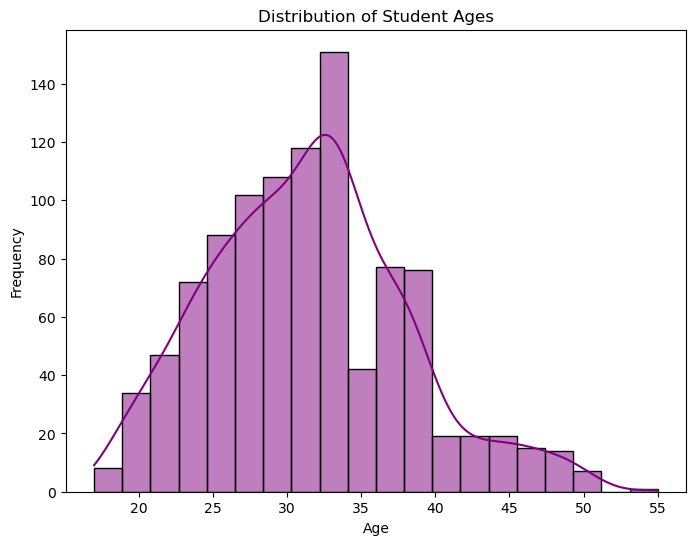

In [97]:
#Q5: What is the distribution of student ages?

# Histogram to show age distribution
plt.figure(figsize=(8,6))
sns.histplot(data['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Student Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Here, the age distribution of the students can be seen starting from around 10 it goes up until it reaches the top with
around 33 and then gradually comes down till 55. Hence, most of the population density is around 21 to 40.